In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                        
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression         
from sklearn.model_selection import train_test_split      
from sklearn.model_selection import cross_val_score
from math import sqrt

In [2]:
df = pd.read_csv('Real_estate.csv')

In [3]:
df.shape

(4260, 6)

In [4]:
df.head()

,Unnamed: 0,Location,SleepRoom,BathRoom,Size,Prices
0,0,north,4,5,300 م²,"1,900,000 ريال"
1,1,north,6,5,315 م²,"2,150,000 ريال"
2,2,north,3,3,750 م²,"4,750,000 ريال"
3,3,north,7,5,950 م²,"6,500,000 ريال"
4,4,north,7,5,322 م²,"2,200,000 ريال"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4260 non-null   int64 
 1   Location    4260 non-null   object
 2   SleepRoom   4260 non-null   int64 
 3   BathRoom    4260 non-null   int64 
 4   Size        4260 non-null   object
 5   Prices      4260 non-null   object
dtypes: int64(3), object(3)
memory usage: 199.8+ KB


# Data Pre-processing

In [6]:
#Clean Prices column
df['Prices'] = df['Prices'].str.replace("ريال", "").str.replace(",", "")
df

,Unnamed: 0,Location,SleepRoom,BathRoom,Size,Prices
0,0,north,4,5,300 م²,1900000
1,1,north,6,5,315 م²,2150000
2,2,north,3,3,750 م²,4750000
3,3,north,7,5,950 م²,6500000
4,4,north,7,5,322 م²,2200000
...,...,...,...,...,...,...
4255,995,south,7,5,500 م²,850000
4256,996,south,7,5,270 م²,850000
4257,997,south,5,5,450 م²,1700000
4258,998,south,5,4,552 م²,1200000


In [7]:
#Clean Size column
df['Size'] = df['Size'].str.replace("م²", "")
df

,Unnamed: 0,Location,SleepRoom,BathRoom,Size,Prices
0,0,north,4,5,300,1900000
1,1,north,6,5,315,2150000
2,2,north,3,3,750,4750000
3,3,north,7,5,950,6500000
4,4,north,7,5,322,2200000
...,...,...,...,...,...,...
4255,995,south,7,5,500,850000
4256,996,south,7,5,270,850000
4257,997,south,5,5,450,1700000
4258,998,south,5,4,552,1200000


In [8]:
df = df.drop('Unnamed: 0',axis=1)
df

,Location,SleepRoom,BathRoom,Size,Prices
0,north,4,5,300,1900000
1,north,6,5,315,2150000
2,north,3,3,750,4750000
3,north,7,5,950,6500000
4,north,7,5,322,2200000
...,...,...,...,...,...
4255,south,7,5,500,850000
4256,south,7,5,270,850000
4257,south,5,5,450,1700000
4258,south,5,4,552,1200000


In [9]:
#Size = int(raw_user_age)
df['Size'] = pd.to_numeric(df['Size'])
df['Prices'] = pd.to_numeric(df['Prices'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   4260 non-null   object
 1   SleepRoom  4260 non-null   int64 
 2   BathRoom   4260 non-null   int64 
 3   Size       4260 non-null   int64 
 4   Prices     4260 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 166.5+ KB


In [10]:
df.isna().sum()

Location     0
SleepRoom    0
BathRoom     0
Size         0
Prices       0
dtype: int64

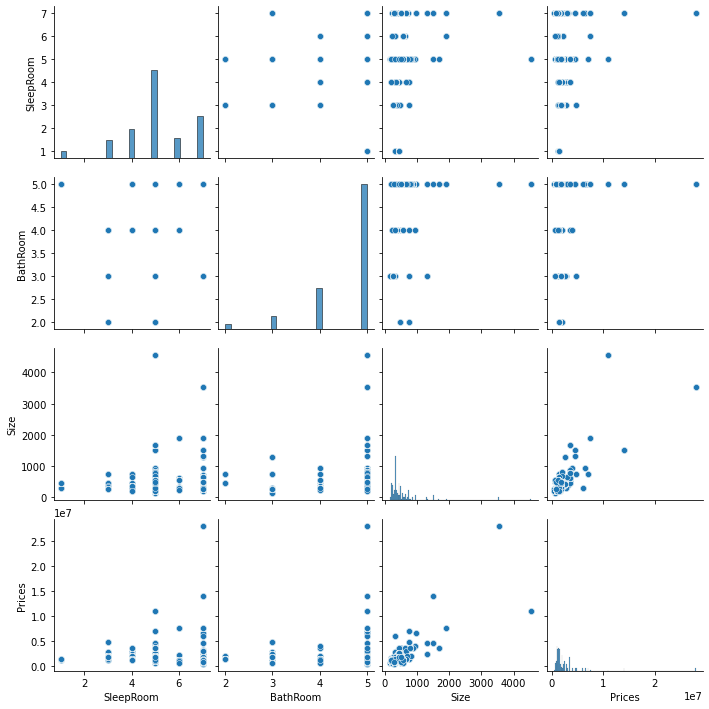

In [11]:
sns.pairplot(df)

In [12]:
avg_Location = df[['Location' ,'Prices']].groupby('Location').mean().reset_index().sort_values(by = 'Prices', ascending = False)
avg_Location

,Location,Prices
2,north,5097500
1,middle,2962500
0,east,2296000
3,south,1162500
4,west,1150000


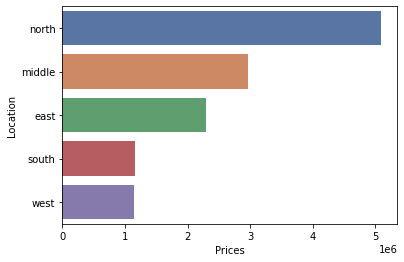

In [13]:
sns.barplot(data=avg_Location, x='Prices',y='Location', palette = 'deep');

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Location'] = labelencoder.fit_transform(df['Location'])
df

,Location,SleepRoom,BathRoom,Size,Prices
0,2,4,5,300,1900000
1,2,6,5,315,2150000
2,2,3,3,750,4750000
3,2,7,5,950,6500000
4,2,7,5,322,2200000
...,...,...,...,...,...
4255,3,7,5,500,850000
4256,3,7,5,270,850000
4257,3,5,5,450,1700000
4258,3,5,4,552,1200000


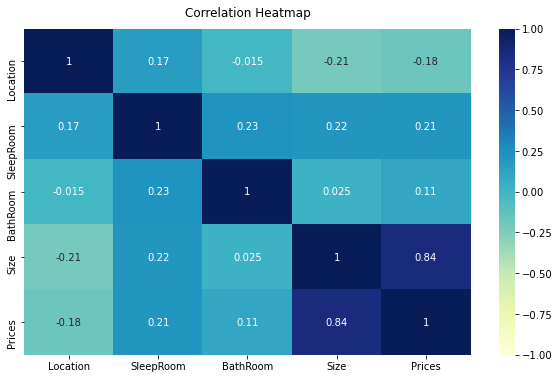

In [15]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


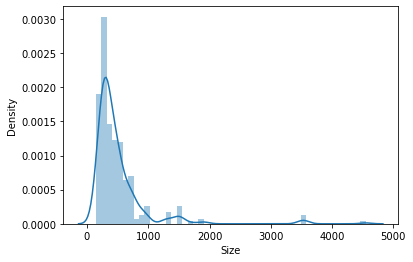

In [16]:
sns.distplot(df['Size']);

# Split dataset [ train - vaidation - test ]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['Size']], df[['Prices']], 
                                                    test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [18]:
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)
print("Validation Data has",X_val.shape)

Training Data has (2087, 1)
Testing Data has (1278, 1)
Validation Data has (895, 1)


In [19]:
list_models=[]
list_scores=[]
list_errors=[]
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_1=lr.predict(X_val)
score_1=r2_score(y_val,pred_1)
error_1=mean_squared_error(y_val,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)
print("Training accuracy: ",r2_score(y_train,lr.predict(X_train)))
print("Training error: ",1-r2_score(y_train,lr.predict(X_train)))
print("Testing accuracy: ",r2_score(y_val,lr.predict(X_val)))
print("Testing error: ",1-r2_score(y_val,lr.predict(X_val)))

Training accuracy:  0.680253941960147
Training error:  0.319746058039853
Testing accuracy:  0.7097951630513776
Testing error:  0.2902048369486224


In [20]:
lr.coef_

array([[5452.46140938]])

In [21]:
lr.intercept_

array([-328108.31337266])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_squared_error(lr.predict(X_test), y_test))

Mean Absolute Error: 3309842514265.247


In [23]:
test_score = lr.score(X_test, y_test)
test_score

0.7175698685879908

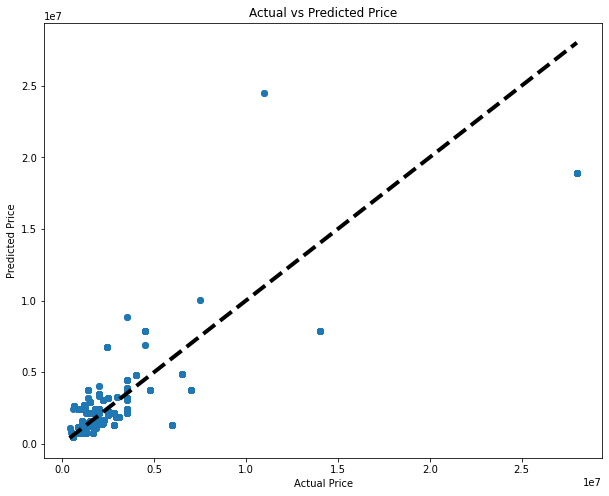

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_val, pred_1)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_title('Actual vs Predicted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
plt.show()

In [25]:
import statsmodels.api as sm
_model = sm.OLS(y_train, X_train, data=df)
results =_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Prices   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                              7820.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        10:04:35   Log-Likelihood:                         -33122.
No. Observations:                2087   AIC:                                  6.625e+04
Df Residuals:                    2086   BIC:                                  6.625e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size        5125.3992     57.958     88.433      0.000    5011.737    5239.061
==============================================================================
Omnibus:                      745.223   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20960.877
Skew:                           1.076   Prob(JB):                         0.00
Kurtosis:                      18.376   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)
Plr = LinearRegression()
Plr.fit(X_train_poly, y_train)
print('Mean Absolute Error:', mean_squared_error(Plr.predict(X_test_poly), y_test))

Mean Absolute Error: 3289413181591.092


In [27]:
print("Train score",Plr.score(X_train_poly, y_train))

print("Test score",Plr.score(X_test_poly, y_test))

print("val score",Plr.score(X_val_poly, y_val))

0.6803741219763744
0.7193131113818558
0.7110331221732928
